[[0.69314718]]


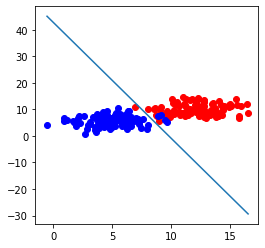

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def draw_line(x1,x2):
    ln = plt.plot(x1,x2)

def sigmoid(score):
    return 1 / (1 + np.exp(-score)) # return the sigmoid function for the given lienar combinations

def calculate_error(line_parameters, points, y):
    n = points.shape[0] # number of points, required for taking the average
    p = sigmoid(points * line_parameters)
    cross_entropy = -(1/n) * (np.log(p).T*y + np.log(1-p).T*(1-y))
    return cross_entropy

def gradient_descent(line_parameters, points, y, learning_rate):
    n = points.shape[0]
    for i in range(2000):
        p = sigmoid(points * line_parameters)
        gradient = points.T * (p - y)*(learning_rate/n)
        line_parameters = line_parameters - gradient
        
        # extract weights and bias from the new line parameters
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        
        # update the coordinates of the new lines from new line parameters
        x1 = np.array([points[:,0].min(), points[:,0].max()])
        x2 = -(b/w2) + (x1 * (-w1/w2))
    draw_line(x1,x2)

n_pts = 100
np.random.seed(0) # produces same random numbers every time the program is run

# generate random values using normal distribution curve
random_x1_val = np.random.normal(12, 2, n_pts) # normalized around 12 with deviation 2 and n_pts number of points
random_x2_val = np.random.normal(10, 2, n_pts) # normalized around 10 with deviation 2 and n_pts number of points

# create an array of these randomly generated points, added with bias of 1
bias = np.ones(n_pts)
top_region = np.array([random_x1_val, random_x2_val, bias]).T
bottom_region = np.array([np.random.normal(5,2,n_pts), np.random.normal(6,2,n_pts), bias]).T

# stack up top and bottom regions on one another and create an array
full_region = np.vstack((top_region, bottom_region))

# create a random line to start with optimizytion with machine learning
# w1 = -0.2 # weight w_1
# w2 = -0.35 # weight w_2
# b = 3.5 # x_2 intercept 'b'
line_parameters = np.matrix([np.zeros(3)]).T

# determine the coordinates to draw the line
# line should cover all the points including the smallest to the largest
x1 = np.array([bottom_region[:,0].min(), top_region[:,0].max()]) # smallest and largest x_1 coordinate
# using the straight line equation w1*x1 + w2*x2 + b = 0, determine the x_2 coordinate
x2 = -(b/w2) + x1 * (-w1/w2)

# from all points from full_region and line_parameters, the values can be determined using matrix multiplication
linear_combination = full_region * line_parameters

# find the probablities of the lienar combinations using the sigmoid function
# here probabilites are for the point lying either in the positive or the negative region 
probabilities = sigmoid(linear_combination)
#print(probabilities)



# define an input y such that y = 1 when the point is blue and y = 0 when its red
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)

# use the calculate error function to determine the error of estimation with the current defined line (blue line in fig)
print(calculate_error(line_parameters, full_region, y))

# generate plots using these arrays of random points
_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
gradient_descent(line_parameters, full_region, y, 0.06)
plt.show()

